In [51]:
from geoprofielen.objects.cpt import CPT, ConversionType
from geoprofielen.objects.borehole import Borehole
import pandas as pd
import seaborn as sns

lines = open('c:/Users/brein/Programming/Python/HDSR/geoprofielen/data/machinelearning/matches.csv').readlines()

In [19]:
def get_soilcode(soillayers, z):
    for sl in soillayers:
        if z <= sl.z_top and z >= sl.z_bottom:
            return sl.soilcode

    return None

In [81]:
result = {}
result_nen = {}

for line in lines:
    args = line.split(',')
    sfile = args[1]
    bfile = args[-3]
    borehole = Borehole.from_file(bfile)
    try:
        borehole.convert()
    except:
        continue
    cpt = CPT.from_file(sfile)
    cpt.convert(ConversionType.THREE_TYPE_RULE)

    zs = [s.z_top for s in borehole.soillayers + cpt.soillayers]
    zs += [s.z_bottom for s in borehole.soillayers + cpt.soillayers]
    zs = sorted(list(set(zs)),reverse=True)

    for i in range(1, len(zs)):
        zm = (zs[i-1] + zs[i]) / 2.
        scb = get_soilcode(borehole.soillayers, zm)
        scs = get_soilcode(cpt.soillayers, zm)

        if scb in ["klei_siltig", "klei_zandig", "klei_humeus"]: scb = "klei"  
        if scs in ["klei_siltig", "klei_zandig", "klei_humeus"]: scs = "klei"  

        if scb and scs:
            keyname = f"{scb}|{scs}"
            if keyname in result.keys():
                result[keyname] += abs(zs[i] - zs[i-1])
            else:
                result[keyname] = abs(zs[i] - zs[i-1])

    cpt.convert(ConversionType.NEN_5104)
    zs = [s.z_top for s in borehole.soillayers + cpt.soillayers]
    zs += [s.z_bottom for s in borehole.soillayers + cpt.soillayers]
    zs = sorted(list(set(zs)),reverse=True)

    for i in range(1, len(zs)):
        zm = (zs[i-1] + zs[i]) / 2.
        scb = get_soilcode(borehole.soillayers, zm)
        scs = get_soilcode(cpt.soillayers, zm)

        if scb in ["klei_siltig", "klei_zandig", "klei_humeus"]: scb = "klei"  
        if scs in ["klei_siltig", "klei_zandig", "klei_humeus"]: scs = "klei" 

        if scb and scs:
            keyname = f"{scb}|{scs}"
            if keyname in result_nen.keys():
                result_nen[keyname] += abs(zs[i] - zs[i-1])
            else:
                result_nen[keyname] = abs(zs[i] - zs[i-1])


In [82]:
result_nen

{'veen|veen': 47.56,
 'klei|veen': 45.23000000000003,
 'veen|klei': 35.16,
 'klei|klei': 123.36000000000035,
 'klei|zand': 39.520000000000024,
 'veen|zand': 5.520000000000003,
 'zand|klei': 11.509999999999998,
 'zand|zand': 50.12000000000001,
 'zand|veen': 5.679999999999999}

In [87]:
data = {
    "grondsoort": list(result.keys()),
    "value":list(result.values())
}

data_nen = {
    "grondsoort": list(result_nen.keys()),
    "value":list(result_nen.values())
}

In [90]:
df = pd.DataFrame(data)
df_nen = pd.DataFrame(data_nen)

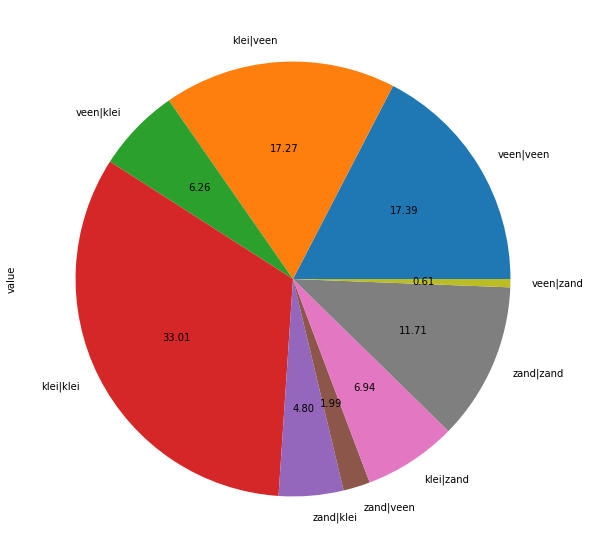

In [94]:
df.plot.pie(x='grondsoort', y='value', figsize=(20, 10), labels=df['grondsoort'].values, legend=False, autopct='%.2f')

<AxesSubplot:ylabel='value'>

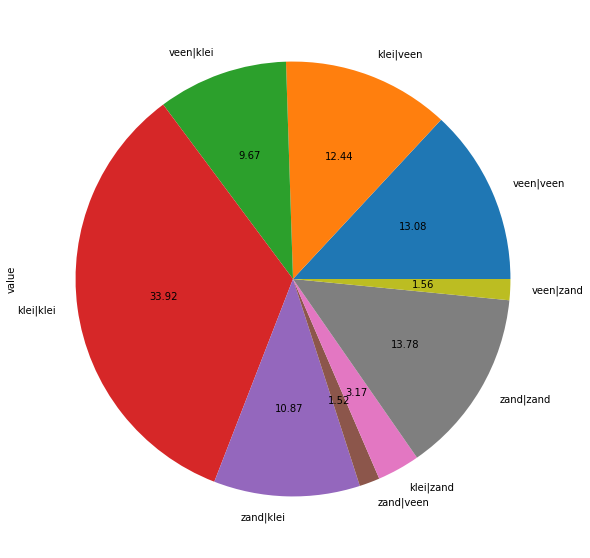

In [96]:
df_nen.plot.pie(x='grondsoort', y='value', figsize=(20, 10), labels=df['grondsoort'].values, legend=False, autopct='%.2f')
